# Explore here

In [212]:
# Import
# Basics
import pandas as pd
import numpy as np

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Seleccion de datos
from sklearn.model_selection import train_test_split

# Escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score
# 

In [213]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [214]:
# Dimensiones del dataframe
df.shape

(1599, 12)

In [215]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [216]:
df.duplicated().sum()
df = df.drop_duplicates()
df.shape

(1359, 12)

In [217]:
df.quality.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

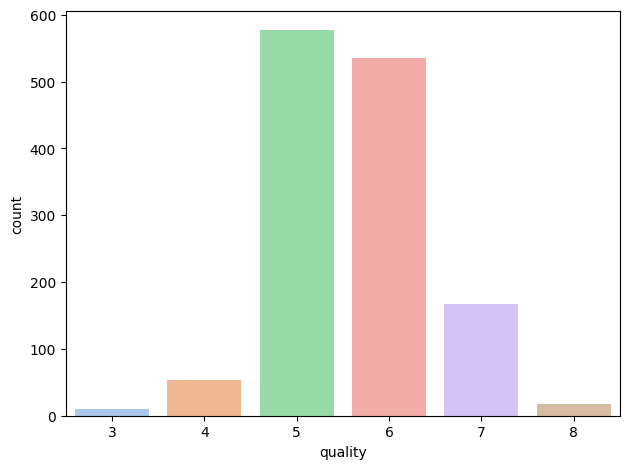

In [218]:
# Analisis de variables categoricas: ["quality"]
sns.countplot(data = df, x = "quality", palette='pastel', hue= "quality", legend=False)
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [219]:
# Agrupacion de valores de quality para establecer escala: Low, Medium, High [0, 1, 2]
def group_quality(quality):
    if quality < 5:
        return 0
    elif quality < 7:
        return 1
    else:
        return 2

df = df.copy()
df.loc[:, "quality_label"] = df["quality"].apply(group_quality)
df = df.drop("quality", axis=1)

df["quality_label"].value_counts()

quality_label
1    1112
2     184
0      63
Name: count, dtype: int64

In [220]:
# Teniendo en cuenta el desbalance tan grande que tienen mis datos estableceremos un umbral de accuracy que mi modelo debe superar
# Este umbral sera decir que todas las predicciones son iguales a la clase que predomina y ver que accuracy daria
# En este caso seria:
df[df["quality_label"] == 1].shape[0] / df.shape[0]
# En este caso deberemos buscar un modelo que de un accuracy superior al 81 %

0.8182487122884474

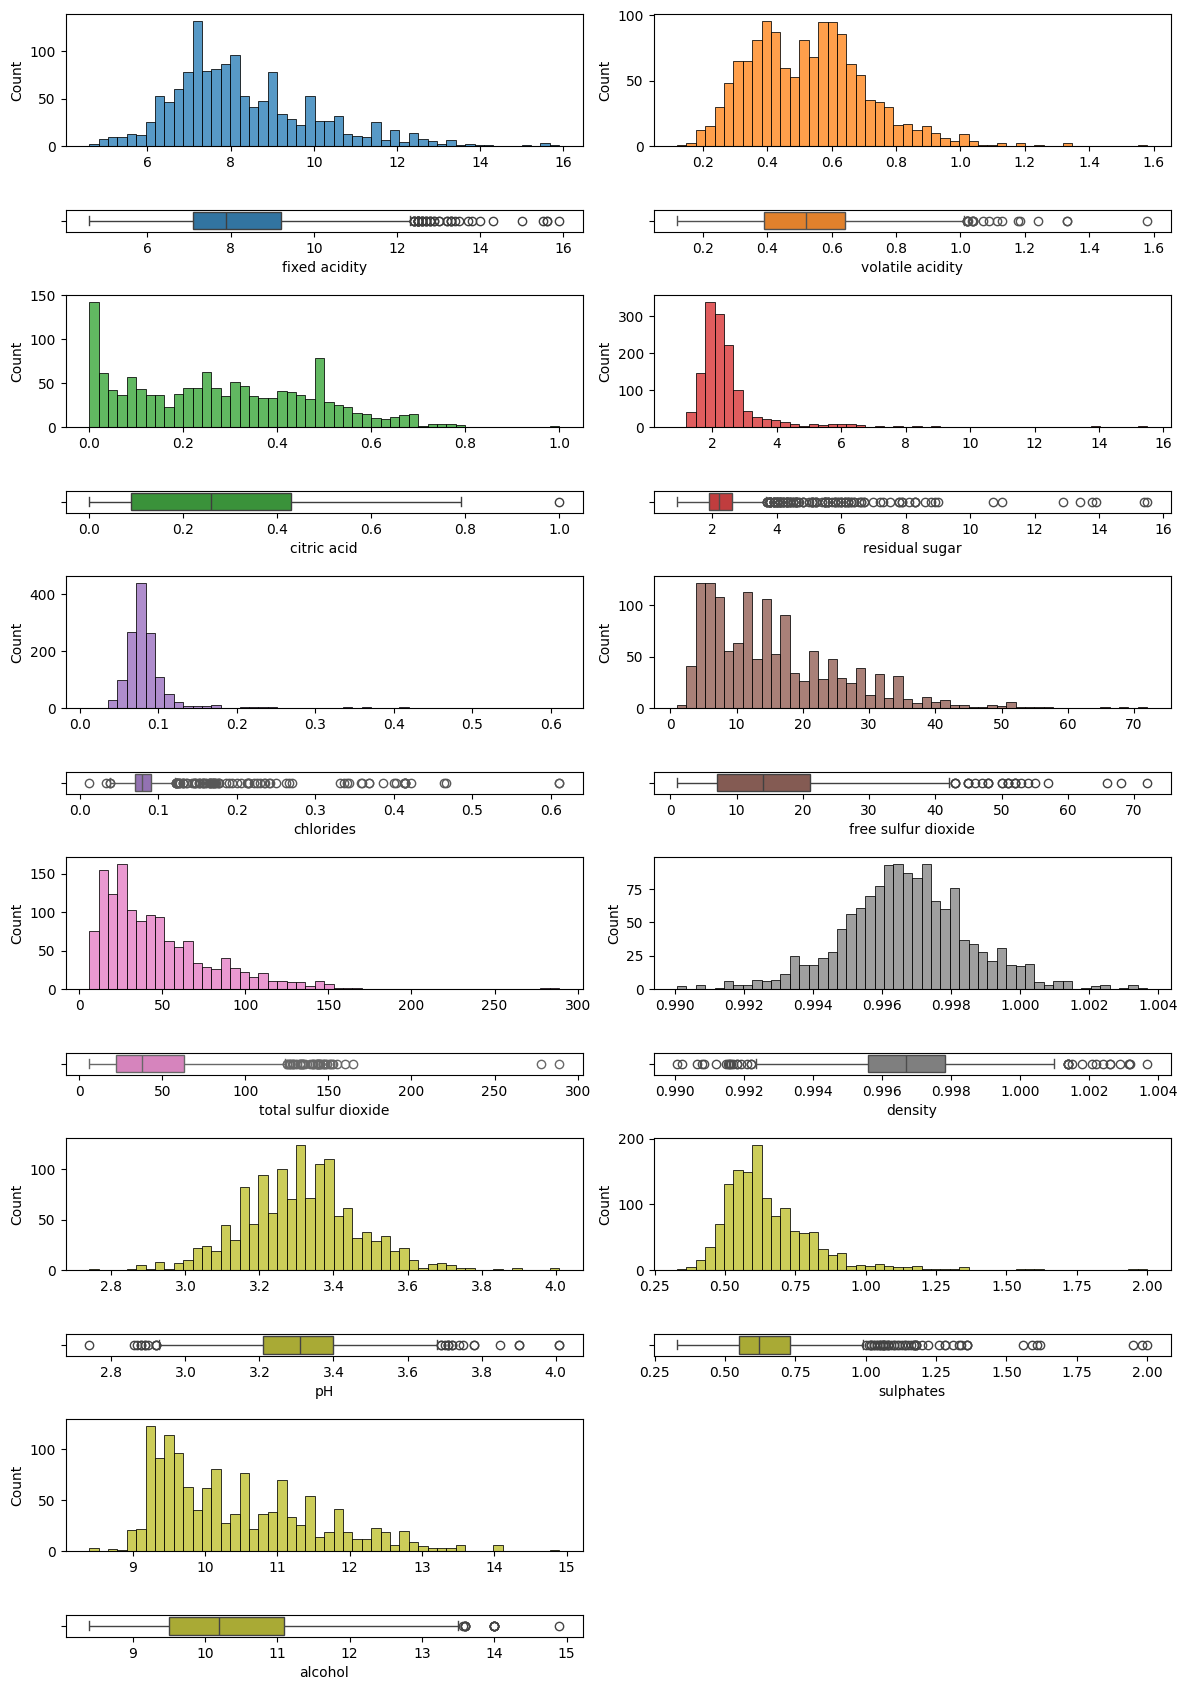

In [221]:
# ANALISIS DE VARIABLES NUMERICAS
# ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
#  'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

fig, axis = plt.subplots(12, 2, figsize = (12, 17), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# fixed acidity
sns.histplot(ax = axis[0, 0], data = df, x = "fixed acidity", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "fixed acidity", color="#1f77b4").set(xlabel = "fixed acidity")

# volatile acidity
sns.histplot(ax = axis[0, 1], data = df, x = "volatile acidity", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "volatile acidity", color="#ff7f0e").set(xlabel = "volatile acidity")

# citric acid
sns.histplot(ax = axis[2, 0], data = df, x = "citric acid", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "citric acid", color="#2ca02c").set(xlabel = "citric acid")

# residual sugar
sns.histplot(ax = axis[2, 1], data = df, x = "residual sugar", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "residual sugar", color="#d62728").set(xlabel = "residual sugar")

# chlorides
sns.histplot(ax = axis[4, 0], data = df, x = "chlorides", bins=50, color="#9467bd").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "chlorides", color="#9467bd").set(xlabel = "chlorides")

# free sulfur dioxide
sns.histplot(ax = axis[4, 1], data = df, x = "free sulfur dioxide", bins=50, color="#8c564b").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "free sulfur dioxide", color="#8c564b").set(xlabel = "free sulfur dioxide")

# total sulfur dioxide
sns.histplot(ax = axis[6, 0], data = df, x = "total sulfur dioxide", bins=50, color="#e377c2").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = df, x = "total sulfur dioxide", color="#e377c2").set(xlabel = "total sulfur dioxide")

# density
sns.histplot(ax = axis[6, 1], data = df, x = "density", bins=50, color="#7f7f7f").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = df, x = "density", color="#7f7f7f").set(xlabel = "density")

# pH
sns.histplot(ax = axis[8, 0], data = df, x = "pH", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = df, x = "pH", color="#bcbd22").set(xlabel = "pH")

# sulphates
sns.histplot(ax = axis[8, 1], data = df, x = "sulphates", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[9, 1], data = df, x = "sulphates", color="#bcbd22").set(xlabel = "sulphates")

# alcohol
sns.histplot(ax = axis[10, 0], data = df, x = "alcohol", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[11, 0], data = df, x = "alcohol", color="#bcbd22").set(xlabel = "alcohol")

axis[10, 1].axis("off")
axis[11, 1].axis("off")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

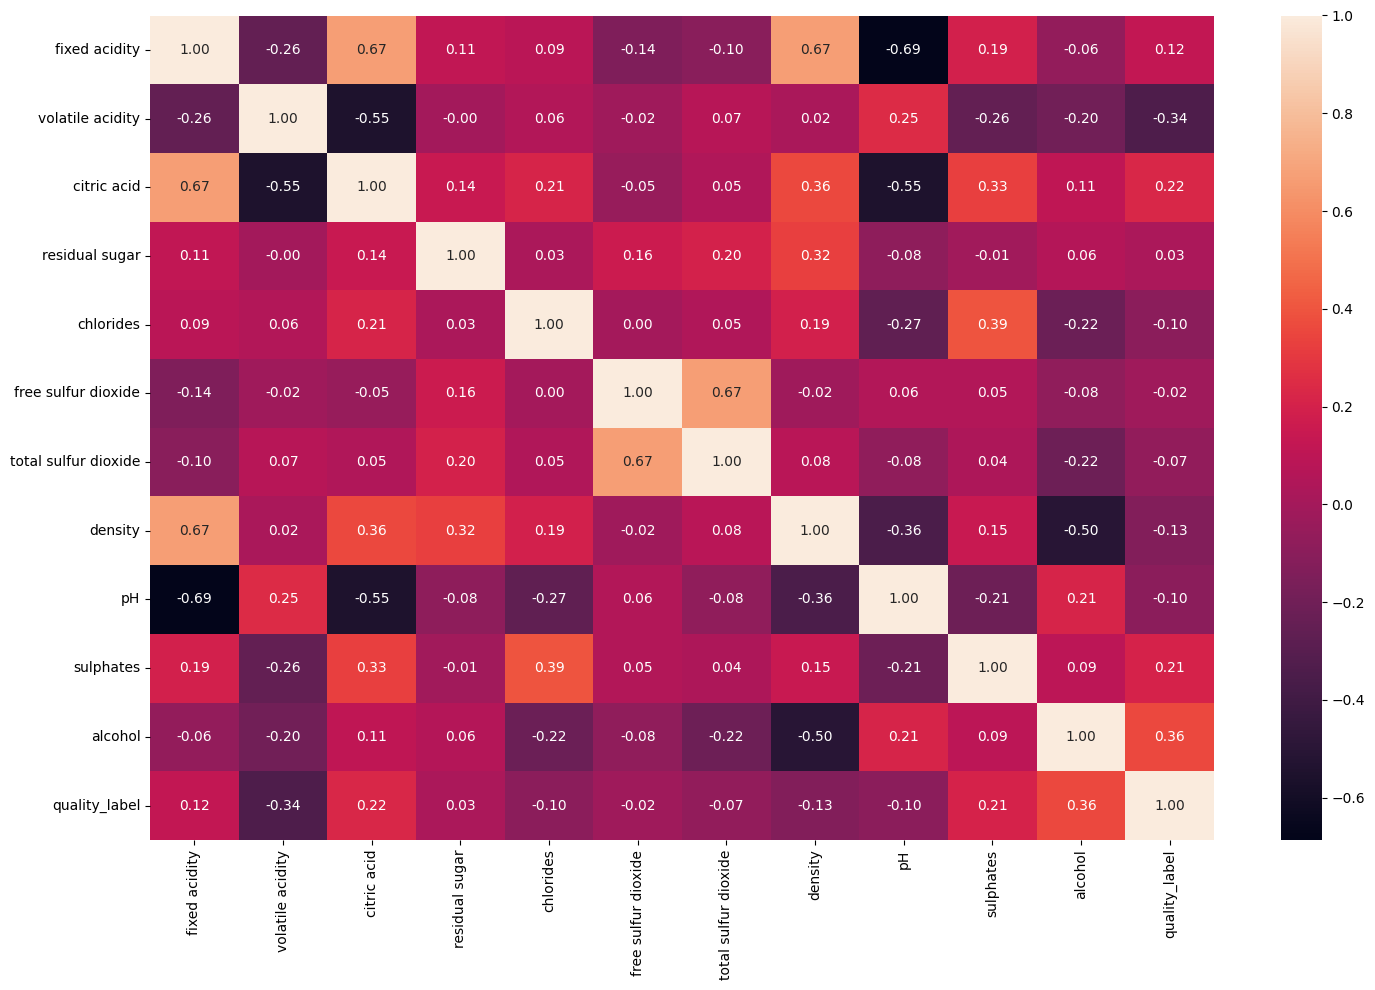

In [222]:
# ANÁLISIS NUMÉRICO - CATEGÓRICO COMPLETO

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap(df.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [223]:
# Separacion de datos para escalado y modelo
X = df.drop("quality_label", axis = 1)
y = df["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [224]:
# Escalado
# Instancio el escalador
scaler = MinMaxScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_train)

# Aplico el escalador en ambos
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1396,0.362832,0.380137,0.126582,0.047945,0.121212,0.042254,0.017668,0.541850,0.391304,0.173913,0.176923
54,0.265487,0.267123,0.189873,0.130137,0.167832,0.450704,0.236749,0.398678,0.269565,0.161491,0.276923
315,0.221239,0.157534,0.367089,0.109589,0.135198,0.267606,0.166078,0.450073,0.486957,0.173913,0.400000
790,0.247788,0.171233,0.544304,0.116438,0.102564,0.239437,0.268551,0.514684,0.408696,0.192547,0.200000
755,0.283186,0.541096,0.088608,0.068493,0.046620,0.295775,0.144876,0.380323,0.565217,0.037267,0.353846


In [225]:
# modelo
model = KNeighborsClassifier()

# entrenamiento
model.fit(X_train_scal, y_train)

KNeighborsClassifier()

In [226]:
# predicion
y_pred_test = model.predict(X_test_scal)
y_pred_train = model.predict(X_train_scal)

In [227]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)

Accuracy Test:  0.8235294117647058
Accuracy Train:  0.8620055197792088


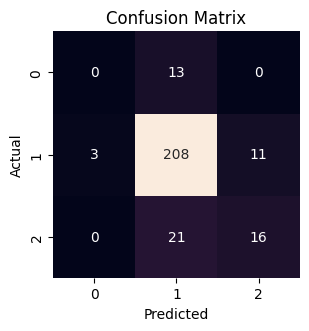

In [228]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(conf_matrix)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Partiendo de estas metricas de base deberemos seguir mejorando la prediccion del modelo. Si bien acierta con un accuracy de 82.3% es solo una mejora de un 2% a predecir que todos los vinos son de clase 2 (Media).

In [229]:
k_range = range(2, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(X_train_scal, y_train)
    scores.append(knn.score(X_test_scal, y_test))

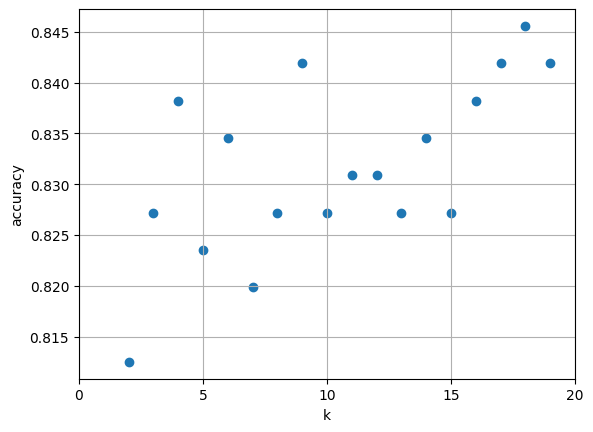

In [230]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid()
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

Accuracy Test:  0.8455882352941176
Accuracy Train:  0.8362465501379944


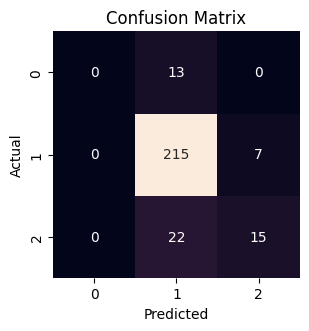

In [231]:
# En la busqueda de mejores k para mejorar el accuracy determinamos que e mejor es k=18
# modelo
model = KNeighborsClassifier(n_neighbors=18)
# entrenamiento
model.fit(X_train_scal, y_train)
# predicion
y_pred_test = model.predict(X_test_scal)
y_pred_train = model.predict(X_train_scal)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)
conf_matrix = confusion_matrix(y_test, y_pred_test)
# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(conf_matrix)
plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Hay evidente mejora en cuanto a la metrica de accuracy, pero al tener tan pocos datos en las clases 0 y 2 para el entrenamiento el modelo no es capaz de aprender correctamente patrones que le permitan identificar esas clases minoritarias. Le aplicaremos el metodo RandomOverSampler para intentar balancear las clases igualando el numero de muestras mayoritarias al resto. Cabe apuntar que esto implica generar datos nuevos que, de por si van a introducir ruido en la muestra.

In [285]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [286]:
# Escalado
# Instancio el escalador
scaler = MinMaxScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_resampled)

# Aplico el escalador en ambos
X_train_scal = scaler.transform(X_resampled)
X_train_scal = pd.DataFrame(X_train_scal, index = X_resampled.index, columns = X_resampled.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.362832,0.380137,0.126582,0.047945,0.121212,0.042254,0.017668,0.541850,0.391304,0.173913,0.176923
1,0.265487,0.267123,0.189873,0.130137,0.167832,0.450704,0.236749,0.398678,0.269565,0.161491,0.276923
2,0.221239,0.157534,0.367089,0.109589,0.135198,0.267606,0.166078,0.450073,0.486957,0.173913,0.400000
3,0.247788,0.171233,0.544304,0.116438,0.102564,0.239437,0.268551,0.514684,0.408696,0.192547,0.200000
4,0.283186,0.541096,0.088608,0.068493,0.046620,0.295775,0.144876,0.380323,0.565217,0.037267,0.353846


In [304]:
y_resampled.value_counts()

quality_label
1    890
2    890
0    890
Name: count, dtype: int64

Accuracy Test:  0.6360294117647058
Accuracy Train:  0.8910112359550562


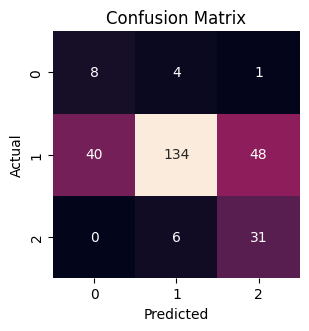

In [288]:
# modelo
model = KNeighborsClassifier()
# entrenamiento
model.fit(X_train_scal, y_resampled)
# predicion
y_pred_test = model.predict(X_test_scal)
y_pred_train = model.predict(X_train_scal)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_resampled, y_pred_train)
print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)
conf_matrix = confusion_matrix(y_test, y_pred_test)
# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(conf_matrix)
plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [289]:
k_range = range(2, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(X_train_scal, y_resampled)
    scores.append(knn.score(X_test_scal, y_test))

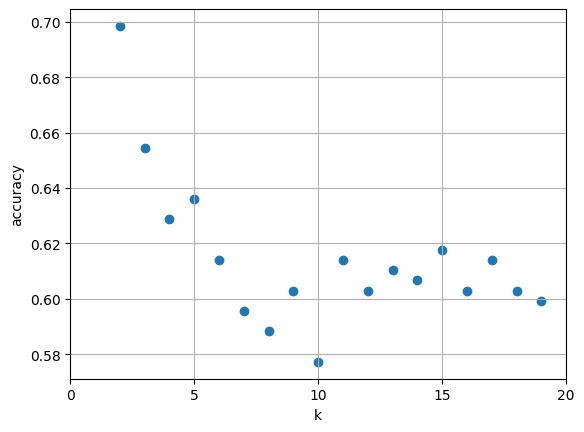

In [290]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid()
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

Accuracy Test:  0.6985294117647058
Accuracy Train:  0.9558052434456928


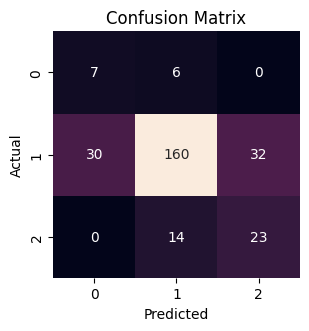

In [294]:
# modelo
model = KNeighborsClassifier(n_neighbors = 2)
# entrenamiento
model.fit(X_train_scal, y_resampled)
# predicion
y_pred_test = model.predict(X_test_scal)
y_pred_train = model.predict(X_train_scal)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_resampled, y_pred_train)
print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)
conf_matrix = confusion_matrix(y_test, y_pred_test)
# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(conf_matrix)
plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Mejora en mi prediccion de valores minoritarios pero gran muestra de overfitting. Vamos a hacer SelectKBest para seleccionar menos parametros por relevancia

In [295]:
from sklearn.feature_selection import SelectKBest, f_classif

In [301]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_train_scal, y_resampled)

mask = selector.get_support()
selected_features = X_train_scal.columns[mask]
print("Variables seleccionadas:", selected_features.tolist())

Variables seleccionadas: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Accuracy Test:  0.6617647058823529
Accuracy Train:  1.0


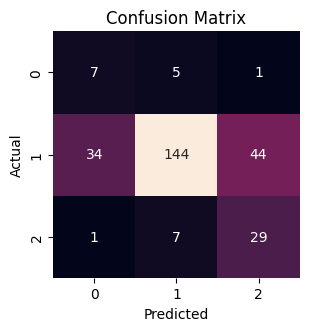

In [314]:
X_train_sel = selector.transform(X_train_scal)
X_test_sel = selector.transform(X_test_scal)

# modelo
model = KNeighborsClassifier(n_neighbors=6, weights="distance")
# entrenamiento
model.fit(X_train_sel, y_resampled)
# predicion
y_pred_test = model.predict(X_test_sel)
y_pred_train = model.predict(X_train_sel)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_resampled, y_pred_train)
print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)
conf_matrix = confusion_matrix(y_test, y_pred_test)
# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(conf_matrix)
plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

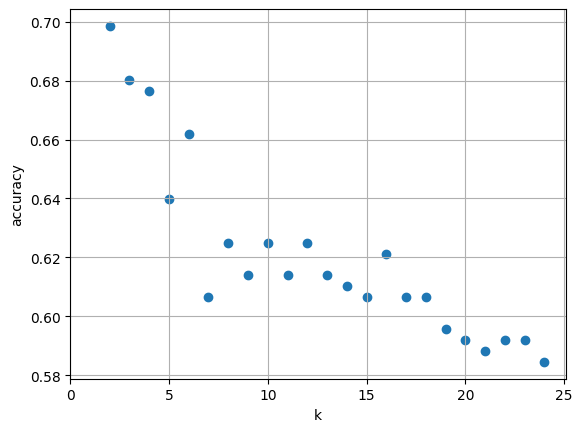

In [313]:
k_range = range(2, 25)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights="distance")

    knn.fit(X_train_sel, y_resampled)
    scores.append(knn.score(X_test_sel, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid()
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25])
plt.show()

**CONCLUSIONES**  

El dataset tiene muy pocos datos y no permite al algoritmo aprender correctamente patrones que le ayuden a identificar la calidad del vino de forma satisfactoria. Alcanzamos en el mejor de los casos, balanceando la muestra, entre un 60 y un 65 % de acierto. Con el algoritmo inicial y los datos originales se alcanzaba mayor accuracy pero era practicamente una toma arbitraria de decisiones por causa de la clase tan mayoritaria. Se propone como solucion tratar de obtener mas datos y aplicarle a su vez varios algoritmos de clasificacion para mejorar las metricas.